# Basic algorithms for image analysis - Practice - Assignment 4

This notebook is presented as an Assignment for the course "Sensor Data Analytics" at Eötvos Lorand University (ELTE).

The goal for this assignment is to program a thinning algorithm.

The output must be composed by the thinned image

It is not allowed the use of python-libraries for performing the calculations.

## 1.- Import libraries

In [3]:
import cv2
import urllib
import numpy as np
from matplotlib import pyplot as plt

## 2.- Read images

**Note:** We read the images online, internet connection needed

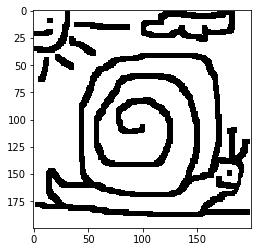

In [4]:
# Black & White image
req = urllib.request.urlopen('http://athos.vision.sztaki.hu/~mitya/education/sdapr/test-images/PNG/csiga.png')
arr = np.asarray(bytearray(req.read()))
img = cv2.imdecode(arr, -1) # 'Load it as it is'
req.close()

# Display
plt.imshow(img, cmap='gray')
plt.show()

In [5]:
img.shape

(200, 200)

## 3.- Functions needed

4. **tr**, Computes the number of zero to nonzero transitions
        Input --> matrix 3x3 m
        Output --> Number of transitions n

In [6]:
def tr(m):
    v = []
    v.append(m[0][1])
    v.append(m[0][0])
    v.append(m[1][0])
    v.append(m[2][0])
    v.append(m[2][1])
    v.append(m[2][2])
    v.append(m[1][2])
    v.append(m[0][2])
    v.append(m[0][1])
    number = 0
    if v[0] == 255:
        is_zero = 1
    else:
        is_zero = 0
    for i in v[1:len(v)]:
        if i == 255 and is_zero != 1:
            is_zero = 1
        if i != 255 and is_zero == 1:
            number += 1            
            is_zero = 0
    return number

4. **thinning**, Performs the thinning algorithm
        Input --> image
        Output --> Display of the original and thinned image

In [7]:
a = np.asarray([[255,255,255],[1,1,255],[255,255,255]])
len(np.where(a!=255)[0])

2

In [16]:
def thinning(image):
    # 1.- Copy the image and initialize variables
    u0 = image.copy()
    u1 = image.copy()
    u2 = image.copy()

    rows = u0.shape[0]
    cols = u0.shape[1]

    cont = True
    k = 0
    # 2.- Loop through the pixels
    while cont:
        for i in range(0, rows):
            for j in range(0, cols):
                # 2.1- Omit borders
                if i < 2 or j < 2  or i > rows-3 or j > cols-3:
                    u2[i][j] = 255
                    u1[i][j] = 255
                elif u2[i][j] != 255:
                    # 2.2.- Operations
                    a = u1[i-1:i+2,j-1:j+2]
                    a2 = u1[i-2:i+1,j-1:j+2]
                    a4 = u1[i-1:i+2,j-2:j+1]
                    nzeros = len(np.where(a!=255)[0]) - 1
                    t = tr(a)
                    t2 = tr(a2)
                    t4 = tr(a4)
                    p2 = 1
                    p4 = 1
                    if (a[0][1]==255) or (a[1][0] == 255) or (a[1][2]==255):
                        p2 = 0
                    if (a[0][1]==255) or (a[1][0] == 255) or (a[2][1]==255):
                        p4 = 0
                    if ((2 <= nzeros) & (nzeros <= 6)) & (t == 1) & ((p2 == 0) or (t2 != 1)) & ((p4 == 0) or (t4 != 1)):
                        u2[i][j] = 255                        
        
        # 2.3.- Check if the images are the same
        
        difference = cv2.subtract(u2, u1)    
        result = not np.any(difference)
        # 3.- Display
        plt.figure("title", figsize=(20,20))
        plt.subplot(121)
        plt.title("Original Image")
        plt.xticks([]), plt.yticks([])
        plt.imshow(u0, cmap='gray')

        plt.subplot(122)
        plt.title("After filter")
        plt.xticks([]), plt.yticks([])
        plt.imshow(u2, cmap='gray')
        plt.show()
        k +=1
        if result:
            cont = False
        else:
            u1 = u2.copy()
            
    # 3.- Display
    plt.figure("title", figsize=(20,20))
    plt.subplot(121)
    plt.title("Original Image")
    plt.xticks([]), plt.yticks([])
    plt.imshow(u0, cmap='gray')

    plt.subplot(122)
    plt.title("After filter")
    plt.xticks([]), plt.yticks([])
    plt.imshow(u1, cmap='gray')

## 4.- Execution

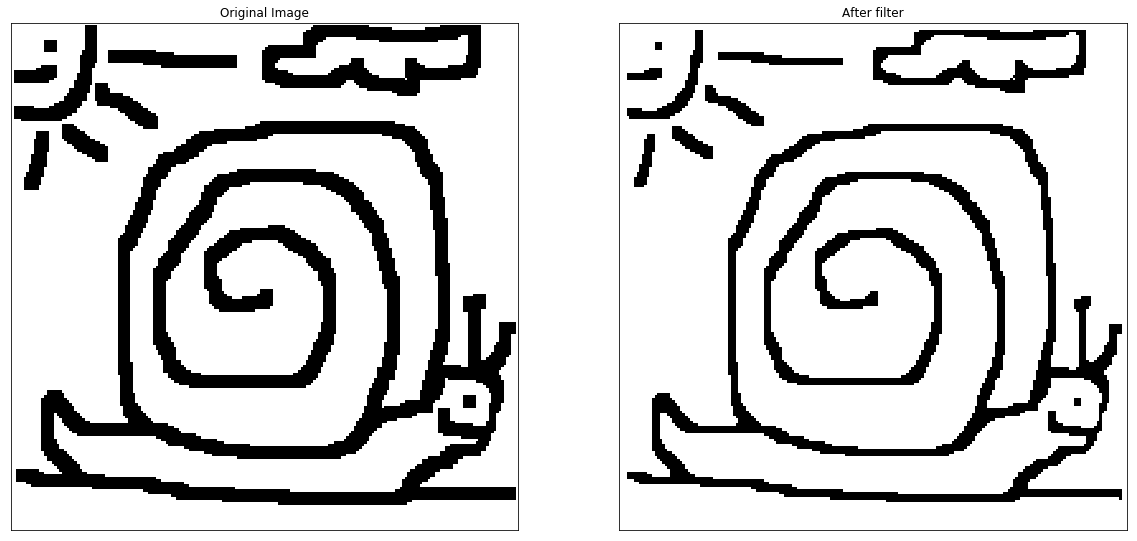

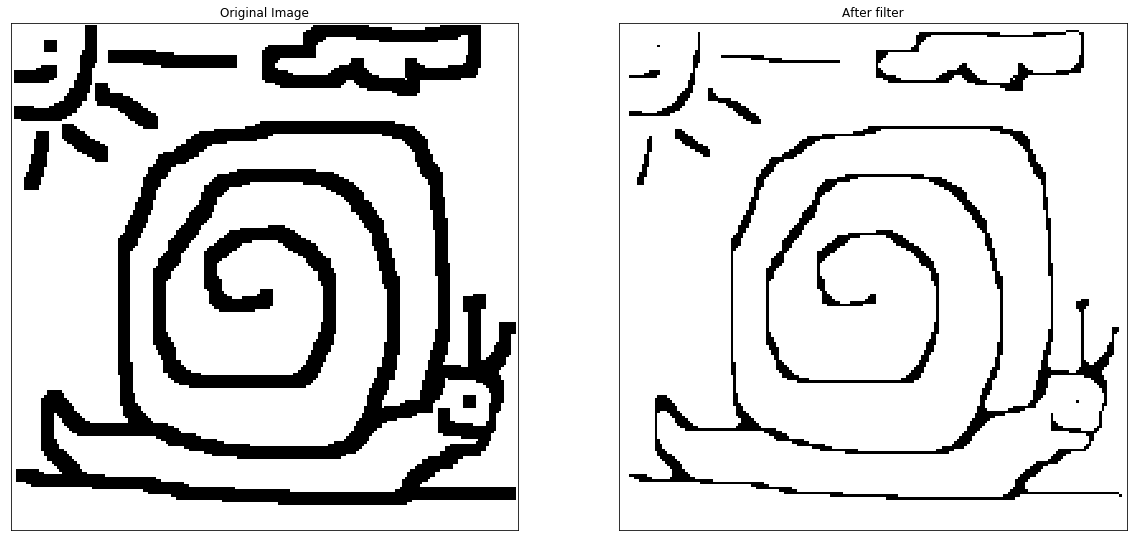

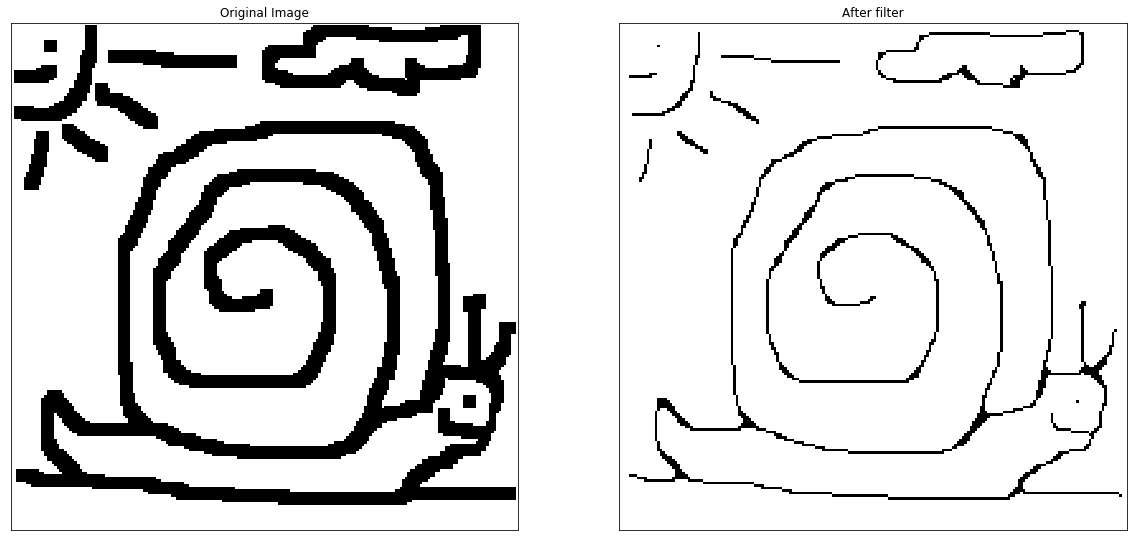

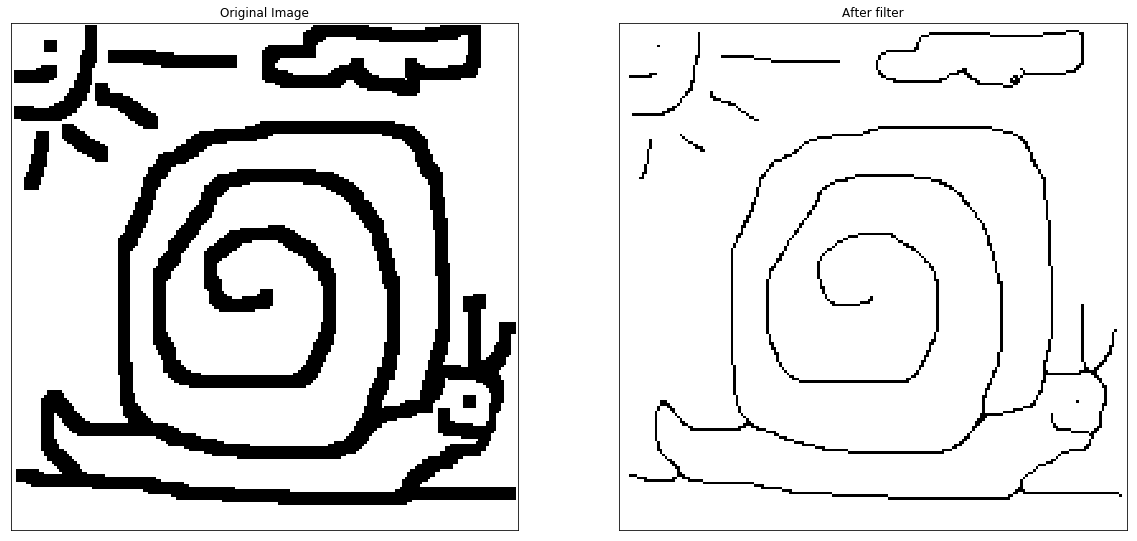

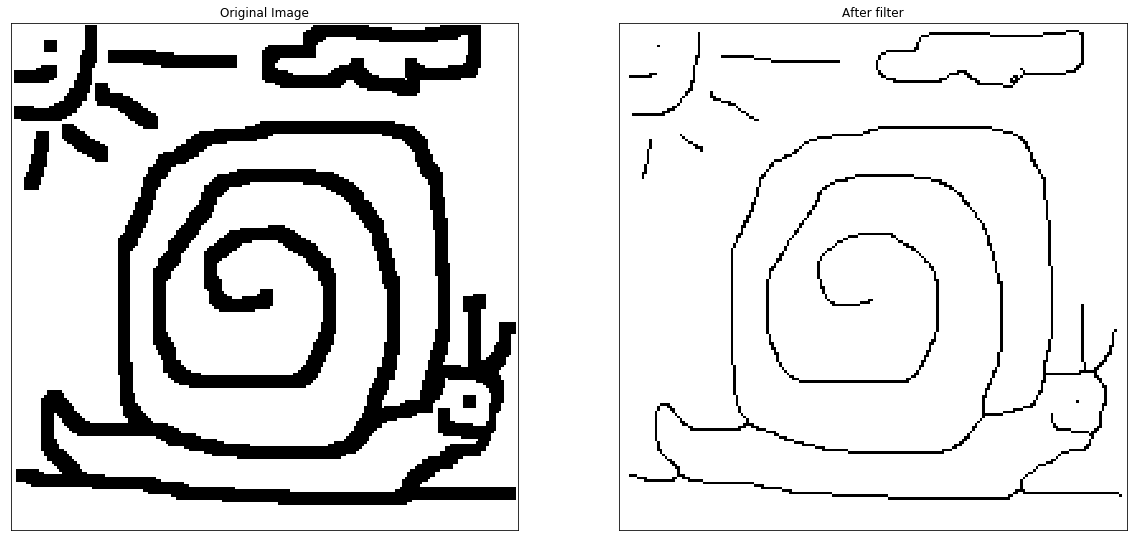

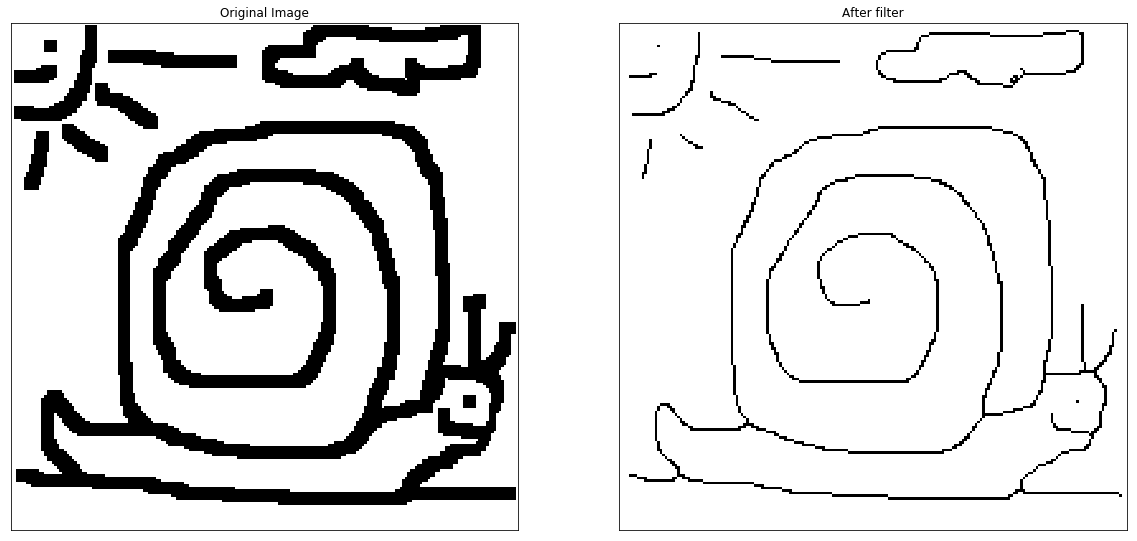

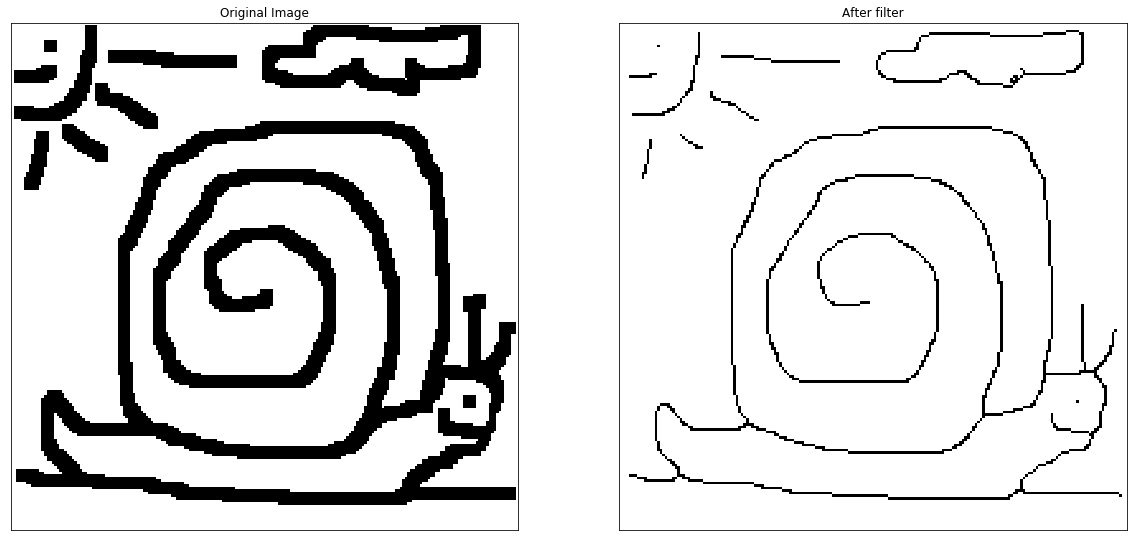

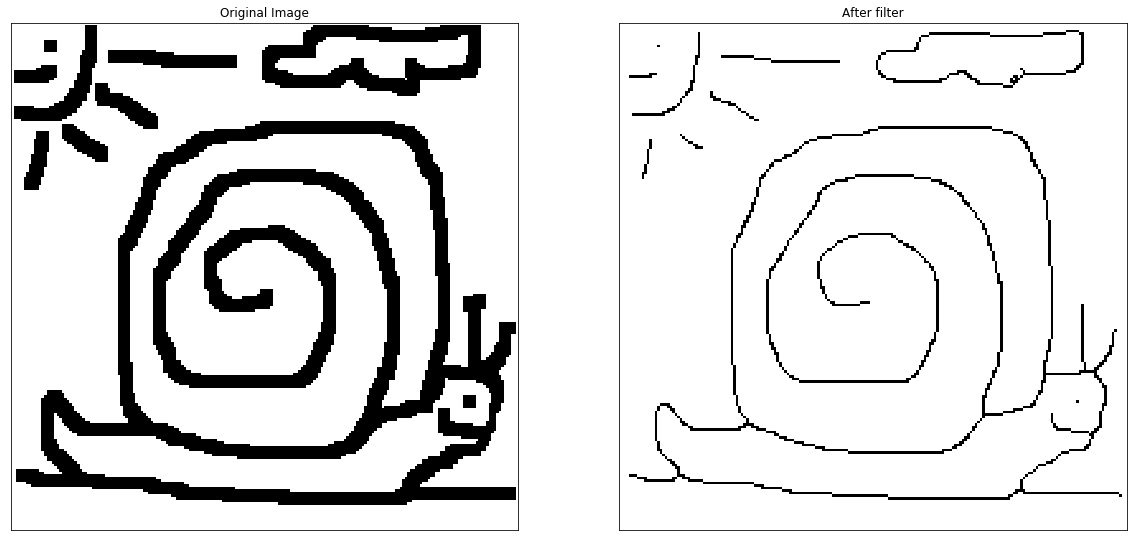

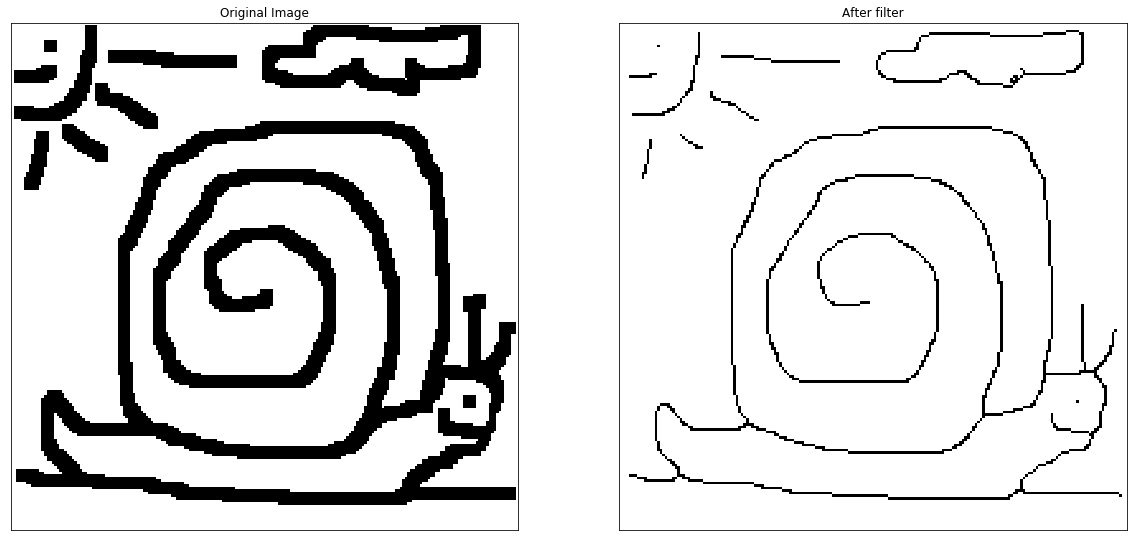

In [17]:
thinning(img)

## 5.- Conclusion

We can appreciate how after several steps the image is reduced by applying the algorithm.